# 匯入所需的套件
#%matplotlib notebook 這行魔法命令就是在告訴 Jupyter Notebook<br>
「請把接下來生成的 matplotlib 圖表設置為可互動模式，讓我們可以更靈活地與圖表進行互動。」


In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
#%matplotlib notebook
print(cv2.__version__)

# 取得基本影像資訊

In [ ]:
# 取得圖像的行，列，通道
imgShape = imgShow.shape
print("Image Shape :",imgShape)

# 圖像的像素量
imgSize = imgShow.size
print("Image size :",imgSize,342*548*3)

# 圖像的資料格式
imgTpye = imgShow.dtype
print("Image Tpye :",imgTpye)

# 獲取像素 (Pixel) 值並修改

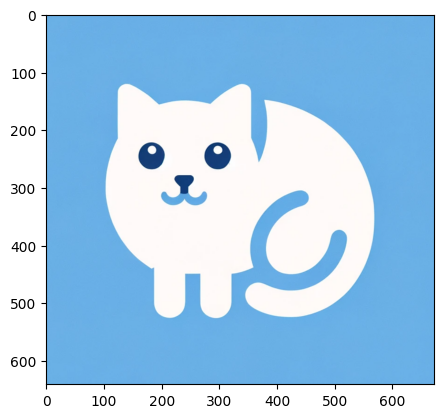

Pixel value RGB: [106 177 230]
Pixel value of single channel: 106
Modified pixel value RGB: [255 255 255]
Modified pixel value of single channel: 255
Pixel value RGB: 255
Pixel value of single channel: 255


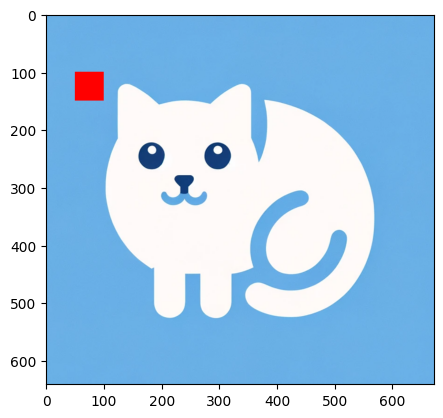

In [3]:
# 讀取圖像並指定以彩色模式讀取
img = cv2.imread('PIC/PictureElement.png', cv2.IMREAD_COLOR)

'''
OpenCV 使用 BGR 模式，而 Matplotlib 使用 RGB 模式
所以需要將 BGR 轉換為 RGB 以在 Matplotlib 中正確顯示
'''
imgShow = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(imgShow)
plt.show()

# 取得特定像素的 RGB 值
px = imgShow[100, 50] 
print("Pixel value RGB:", px)

# 取得該像素的單一頻道值，這裡是紅色通道
px_r = imgShow[100, 50, 0]
print("Pixel value of single channel:", px_r)

# 修改特定像素的 RGB 值為白色
imgShow[100, 50] = [255, 255, 255]
px_m = imgShow[100, 50]
print("Modified pixel value RGB:", px_m)

# 單獨修改該像素的紅色通道值
imgShow[100, 50, 0] = 255
px_r_m = imgShow[100, 50, 0]
print("Modified pixel value of single channel:", px_r_m)

# 使用 item 和 itemset 方法進行像素值的獲取和修改
# 獲取像素的紅色通道值
px_i = imgShow.item(100, 50, 0)
print("Pixel value RGB:", px_i)

# 使用 itemset 修改該像素的紅色通道值 (itemset只能設定單個元素，而非範圍。)
imgShow.itemset((100, 50, 0), 255)
px_r_s = imgShow[100, 50, 0]
print("Pixel value of single channel:", px_r_s)

# 修改一個範圍內所有的像素值的方式
imgShow[100:150, 50:100] = [255,0,0]
plt.imshow(imgShow)
plt.show()

In [ ]:
# 讀取圖像並指定以彩色模式讀取
img = cv2.imread('PIC/PictureElement.png', cv2.IMREAD_COLOR)

# 由於 OpenCV 使用 BGR 模式，而 Matplotlib 使用 RGB 模式，因此需要轉換
# 將圖像從 BGR 轉換到 RGB 以便於 Matplotlib 正確顯示
imgShow = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 使用 Matplotlib 顯示圖像
plt.imshow(imgShow)
plt.show()

# 將 R 通道的值設置為 0，移除紅色成分
imgShow[:,:,0] = 0
print("remove R channel")
plt.imshow(imgShow)
plt.show()

# 將 G 通道的值設置為 0，移除綠色成分
imgShow[:,:,1] = 0
print("remove G channel")
plt.imshow(imgShow)
plt.show()

# 將 B 通道的值設置為 0，移除藍色成分
imgShow[:,:,2] = 0
print("remove B channel")
plt.imshow(imgShow)
plt.show()

# 在圖像中添加白色的直線
imgShow[:,270,:] = 255  # 在特定的列上添加直線
imgShow[167,:,:] = 255  # 在特定的行上添加直線
print("Add line value")
plt.imshow(imgShow)
plt.show()

# 基本操作範例

如何在 Python 中使用 OpenCV 和 Matplotlib 進行基本的圖像處理，包括讀取圖像、色彩空間轉換、選取感興趣區域 (ROI)，以及將該區域複製到圖像的其他位置。

In [ ]:
# 使用 OpenCV 讀取圖像。這裡假設圖像名稱為 'messi5.jpg'，並存放在 'PIC' 資料夾中。
img = cv2.imread(r'PIC/messi5.jpg', cv2.IMREAD_COLOR)

# 將讀取的圖像從 OpenCV 的默認 BGR 色彩空間轉換為 RGB 色彩空間，以便於 Matplotlib 正確顯示。
imgShow = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 打印出原始圖像，並使用 Matplotlib 顯示。
print("Original image")
plt.imshow(imgShow)
plt.show()

# 定義並提取圖像的一個感興趣區域 (ROI)。這裡選取的是圖像中的一部分區域。
imgROI = imgShow[280:340, 330:390]
print("ROI image")
plt.imshow(imgROI)
plt.show()

# 將提取的 ROI 區域複製到圖像的另一個位置。這裡將 ROI 區域複製到圖像的左側。
imgShow[273:333, 100:160] = imgROI
print("Modify image")
plt.imshow(imgShow)
plt.show()

# 拆解和合併通道 I
如何在 Python 中使用 OpenCV 進行圖像處理，具體包括讀取圖像、轉換色彩空間、拆分和合併圖像通道。<br>
目的理解圖像在計算機視覺中的基本處理方式，特別是如何操作和理解圖像的色彩通道。<br>
1. **讀取並顯示原始圖像**

   讀取圖像並將其從 BGR 色彩空間轉換為 RGB，然後顯示該圖像
2. **拆解並顯示各通道**
   將圖像的 RGB 通道進行拆分，並分別顯示每個通道。<br>
   拆分後，每個通道被視為灰階圖像，顯示該通道的強度。

3. **合併通道並顯示結果**
   
將分開的三個通道重新合併成一個彩色圖像，並顯示出<br>
   步驟顯示如何從單獨的色彩強度層面重建原始圖

   道（紅色）：。


Original image


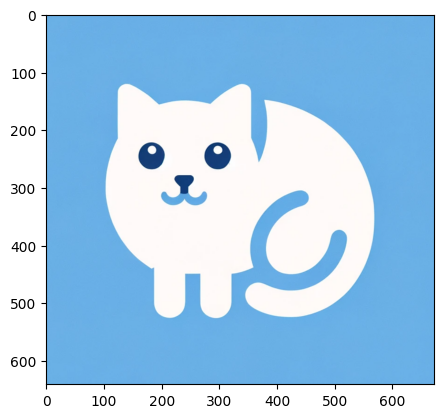

R channel


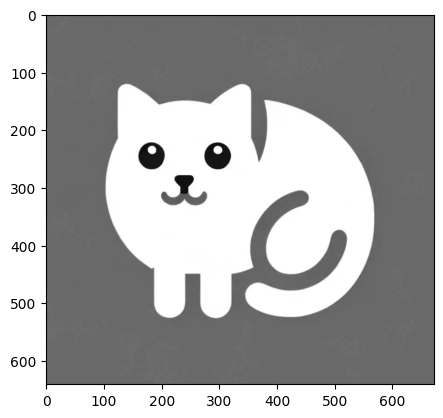

G channel


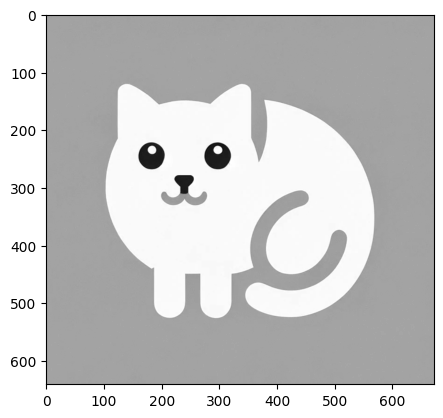

B channel


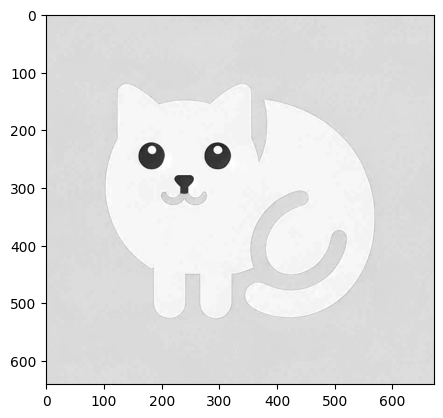

Merge channel


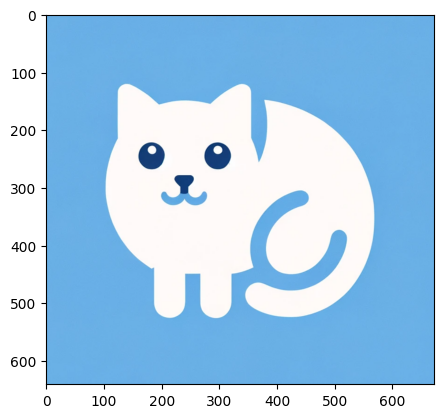

In [4]:
# 讀取並顯示原始圖像
img = cv2.imread('PIC/PictureElement.png', cv2.IMREAD_COLOR)
imgShow = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print("Original image")
plt.imshow(imgShow)
plt.show()

# 拆解並顯示各通道
r,g,b = cv2.split(imgShow)
print("R channel")
plt.imshow(r,cmap='gray')
plt.show()

print("G channel")
plt.imshow(g,cmap='gray')
plt.show()

print("B channel")
plt.imshow(b,cmap='gray')
plt.show()

# 合併通道並顯示結果
imgMerge = cv2.merge([r,g,b])
print("Merge channel")
plt.imshow(imgMerge)
plt.show()

# 拆解和合併通道 II
將 R 和 B 通道重新合併，而將 G 通道設置為 0，創建一個新的圖像並顯示。

In [ ]:
# 合併通道
imgMerge = np.zeros(imgShow.shape, np.uint8)
imgMerge[:,:,0]=r
imgMerge[:,:,1]=g
imgMerge[:,:,2]=0
print("Merge channel")
plt.imshow(imgMerge)
plt.show()

plt.imshow(imgShow)
plt.show()

# 圖像運算
### 影像相加

In [ ]:
# np.zeros((row,column,channels), np.uint8)
blackWhite=np.ones(imgShow.shape, np.uint8)
blackWhite[:]=255
width = 100
for i in range(blackWhite.shape[0]):
    for j in range(blackWhite.shape[1]):
        if int(i/width)%2 == 0:
            if int(j/width)%2 == 1:
                blackWhite[i,j] = [0,0,0]
        if int(i/width)%2 == 1:
            if int(j/width)%2 == 0:
                blackWhite[i,j] = [0,0,0]
plt.show()

In [ ]:
x = np.uint8([250])
y = np.uint8([10])
# 用 add 超過 255其數值會為 255
print(cv2.add(x,y))
# x+y 超過 255 會從 0 開始加
print(x+y)
# y-x 超過 0 會從 255 開始減
print(y-x)

print("Original image")
plt.imshow(imgMerge)
plt.show()
print("Black White image")
plt.imshow(blackWhite)
plt.show()
print("cv2.add function")
imgtest = cv2.add(blackWhite,imgMerge)
plt.imshow(imgtest)
plt.show()
print("x+y")
imgtest = blackWhite+imgMerge
plt.imshow(imgtest)
plt.show()

### 影像相減

In [ ]:
img = cv2.imread('PIC/PictureElement.png', cv2.IMREAD_COLOR)
imgShow = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print("Original image")
plt.imshow(imgShow)
plt.show()

# 合併通道
imgMerge = np.zeros(imgShow.shape, np.uint8)
imgMerge[:,:,0]=r
imgMerge[:,:,1]=g
imgMerge[:,:,2]=b
print("Merge channel")
plt.imshow(imgMerge)
plt.show()

print("Original image")
plt.imshow(imgMerge)
plt.show()
print("Black White image")
plt.imshow(blackWhite)
plt.show()
print("cv2.subtract function")
imgtest = cv2.subtract(imgMerge,blackWhite)
plt.imshow(imgtest)
plt.show()
print("x-y")
imgtest = imgMerge-blackWhite
plt.imshow(imgtest)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 開啟原始的圖檔
img = cv2.imread('PIC/PictureElement.png', cv2.IMREAD_GRAYSCALE)

# 生成一個隨機灰階雜訊圖像(與img一樣大小)
# noise = np.random.rand(img) * 255 #error

noise = np.random.randint(0, 256,img.shape, dtype='uint8')

# 將浮點數據轉換為整數
noise = noise.astype(np.uint8)

# 使用 matplotlib 顯示雜訊圖像
plt.imshow(noise, cmap='gray')
plt.show()

## 圖像混和

In [ ]:
alpha = 0.1
imgWeight=cv2.addWeighted(noise,alpha,img,1-alpha,0)
plt.imshow(imgWeight)
plt.show()

## OpenCV 圖像疊加小練習
使用 OpenCV 來讀取三張圖像（紅色、綠色和藍色圖像），並將它們進行疊加，最後顯示疊加後的圖像。

1. 導入 OpenCV 庫<br>
首先，需要導入 OpenCV 庫以便於後續的圖像處理操作。

2. 讀取圖像 <br>
從文件系統中讀取三張圖像：一張紅色圖像、一張綠色圖像和一張藍色圖像。這些圖像將用於後面的疊加操作。

3. 圖像疊加<br>
首先，將紅色和綠色圖像進行疊加，然後將得到的結果與藍色圖像進行疊加。這樣就可以獲得三種顏色疊加後的圖像。

4. 顯示結果<br>
使用 OpenCV 的顯示功能，將疊加後的圖像展示在一個窗口中。

5. 等待用戶輸入以結束程序<br>
程序會等待用戶按下任意鍵，然後關閉顯示窗口並結束程序。這一步確保用戶有足夠的時間查看結果圖像。

`cv2.waitKey(0)` 會使程式暫停，直到用戶按下一個鍵。<br>
在這之後，`cv2.destroyAllWindows()` 會關閉所有 OpenCV 創建的窗口。

* 注意：疊加圖像的大小和類型需要相同，否則 cv2.add 函數將會出錯。
* 此外，疊加後的像素值會被截斷到 255 的最大值範圍內，這可能會導致一些視覺上的飽和效果。果。戶有足夠的時間查看結果圖像。一些視覺上的飽和效果。

In [ ]:
import cv2

img_red = cv2.imread('PIC/R.png')
img_green = cv2.imread('PIC/G.png')
img_blue = cv2.imread('PIC/B.png')

output = cv2.add(img_red, img_green)  # 疊加紅色和綠色
output = cv2.add(output, img_blue)    # 疊加藍色

cv2.imshow('oxxostudio', output)

cv2.waitKey(0)     # 按下任意鍵停止
cv2.destroyAllWindows()